# SQLAlchemy Homework: by William Oliver

In [632]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [633]:
import numpy as np
import pandas as pd

In [634]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [635]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [636]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [637]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [638]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [639]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [640]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis - Precipitation Analysis

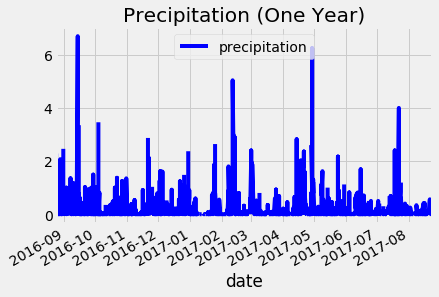

In [641]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
precip_date = precip_date[0]

# Calculate the date 1 year ago from the last data point in the database
last_year = dt.datetime.strptime(precip_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Load the query results into a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query,columns=['date', 'precipitation'])
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'], format='%Y-%m-%d')
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date',ascending=True)

# Plot the results using the DataFrame plot method
precipitation_df .plot(title="Precipitation (One Year)", color = "blue")
plt.legend(loc='upper center')
plt.savefig("One_Year_Precipitation.png")
plt.show()

In [642]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Climate Analysis - Station Analysis

In [643]:
# Design a query to calculate the total number of stations
available_stations = session.query(Measurement.station).distinct().count()
print(f"Stations Available: {available_stations} ")

Stations Available: 9 


In [644]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, 
                       func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations")
most_active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [645]:
# Finding single Most Active Station 
active_stations = most_active_stations[0][0]
print(f"Most Active Station: {active_stations}")

Most Active Station: USC00519281


In [646]:
# Calculating the lowest, highest, and average temperatures of Most Active Station
active_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == active_stations).all()
print(f"Active Station Temperatures")
print(f"Low: {active_temp[0][0]} High: {active_temp[0][1]} Average: {round(active_temp[0][2], 1)}")

Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


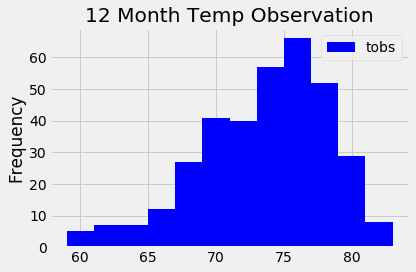

In [647]:
# Design a query to retrieve the last 12 months of Temperature Observation Data (tobs).
high_temp_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
high_temp_station= high_temp_station[0]

# Query the last 12 months of temperature observation data for this station
temperature_observation = session.query(Measurement.tobs).filter(Measurement.date >= last_year).filter(Measurement.station == high_temp_station).all()
temperature_observation = pd.DataFrame(temperature_observation, columns=['tobs'])

# Plot the results as a histogram with bins=12.
temperature_observation.plot.hist(bins=12, color="blue", title="12 Month Temp Observation")
plt.tight_layout()
plt.savefig("Temperature_Observation.png")
plt.show()